<a href="https://colab.research.google.com/github/phuongnguyen99/Spring22_Porject_Math/blob/main/Classical_kernel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.io import imshow, imread
from skimage.color import rgb2yuv, rgb2hsv, rgb2gray, yuv2rgb, hsv2rgb
from scipy.signal import convolve2d
from google.colab import files
import cv2
from google.colab.patches import cv2_imshow


In [ ]:
uploaded = files.upload()

Saving towel.jpeg to towel.jpeg


In [ ]:
img = cv2.imread('towel.jpeg')
img = cv2.cvtColor(src=img, code=cv2.COLOR_BGR2GRAY) 


In [ ]:
towel = rgb2gray(img)
cv2.imwrite('new_towel.jpg', towel)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  """Entry point for launching an IPython kernel.


True

In [ ]:
# Sharpen kernel
sharpen = np.array([[0, -1, 0],
                    [-1, 5, -1],
                    [0, -1, 0]])
# Blur kernel
blur = (1 /9) * np.array([[1, 1, 1],
                          [1, 1, 1],
                          [1, 1, 1]])

# Edge detection kernel
edge = np.array([[-1, -1, -1],
                 [-1, 8, -1],
                 [-1, -1, -1]])

# Gaussin 3*3
gaussian = (1 / 16) * np.array([[1, 2, 1],
                                [2, 4, 2],
                                [1, 2, 1]])

# Gaussin 5*5
gaussian_five_kernel = (1/256) * np.array([[1,4,6,4,1],
                                           [4,16,24,16,4],
                                           [6,24,36,24,6],
                                           [4,16,24,16,4],
                                           [1,4,6,4,1]])


In [ ]:
def convolve2D(image, kernel, padding=0, strides=1):
    # Cross Correlation
    kernel = np.flipud(np.fliplr(kernel))

    # Gather Shapes of Kernel + Image + Padding
    xKernShape = kernel.shape[0]
    yKernShape = kernel.shape[1]
    xImgShape = image.shape[0]
    yImgShape = image.shape[1]

    # Shape of Output Convolution
    assert (xImgShape - xKernShape + 2 * padding) % strides == 0 , 'Invalid height'
    assert (yImgShape - yKernShape + 2 * padding) % strides == 0, 'Invalid width'
    # xOutput = int(((xImgShape - xKernShape + 2 * padding) / strides) + 1)
    # yOutput = int(((yImgShape - yKernShape + 2 * padding) / strides) + 1)
    xOutput = ((xImgShape - xKernShape + 2 * padding) // strides) + 1
    yOutput = ((yImgShape - yKernShape + 2 * padding) // strides) + 1
    output = np.zeros((xOutput, yOutput))



    #  Apply Equal Padding to All Sides
    if padding != 0:
        imagePadded = np.zeros((image.shape[0] + padding*2, image.shape[1] + padding*2))
        imagePadded[int(padding):int(-1 * padding), int(padding):int(-1 * padding)] = image
        print(imagePadded)
    else:
        imagePadded = image



    for y in range(image.shape[1]):
        # Exit Convolution
        if y > image.shape[1] - yKernShape:
            break
        # Only Convolve if y has gone down by the specified Strides
        if y % strides == 0:
            for x in range(image.shape[0]):
                # Go to next row once kernel is out of bounds
                if x > image.shape[0] - xKernShape:
                    break
                try:
                    # Only Convolve if x has moved by the specified Strides
                    if x % strides == 0:
                        output[x, y] = (kernel * imagePadded[x: x + xKernShape, y: y + yKernShape]).sum()

                except:
                    break

    return output



In [ ]:
sharpen_img = cv2.filter2D(src=img, ddepth=-1, kernel=sharpen)


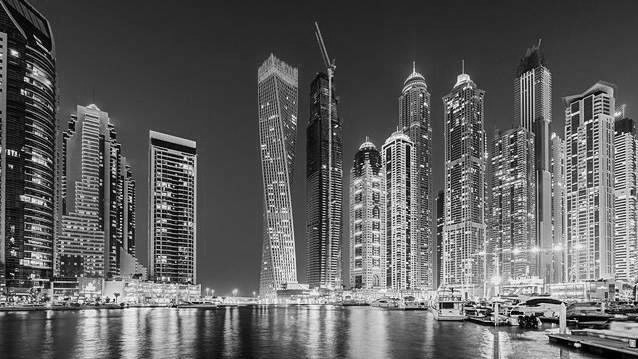

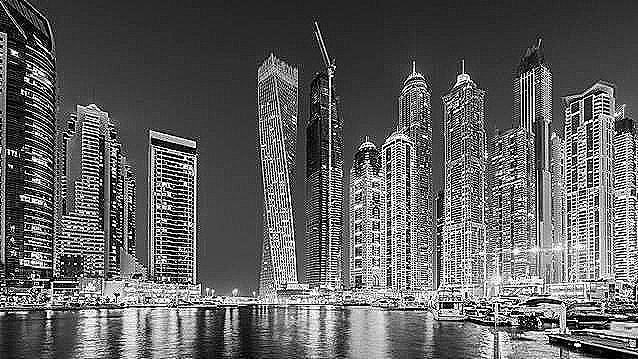

In [ ]:
cv2_imshow( img)
cv2_imshow(sharpen_img)
cv2.waitKey()
cv2.imwrite('sharpen.jpg', sharpen_img)
cv2.destroyAllWindows()

In [ ]:
blur_img = cv2.filter2D(src=img, ddepth=-1, kernel=blur)
blur_img.shape

(359, 638)

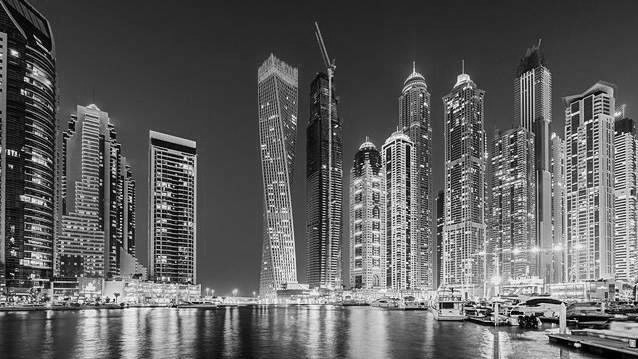

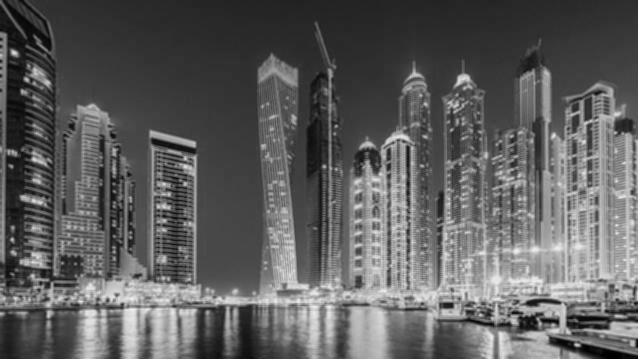

In [ ]:
cv2_imshow(img)
cv2_imshow(blur_img)
cv2.waitKey()
cv2.imwrite('blur.jpg', blur_img)
cv2.destroyAllWindows()

In [ ]:
gaussian_img = cv2.filter2D(src=img, ddepth=-1, kernel=gaussian)

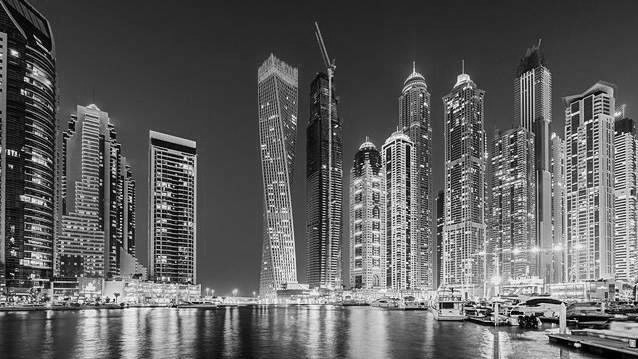

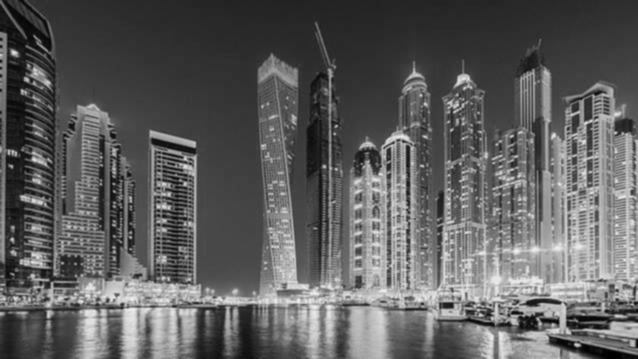

In [ ]:
cv2_imshow(img)
cv2_imshow(gaussian_img)
cv2.waitKey()
cv2.imwrite('gaussian.jpg', blur_img)
cv2.destroyAllWindows()

In [ ]:
edge_img = cv2.filter2D(src=img, ddepth=-1, kernel=edge)

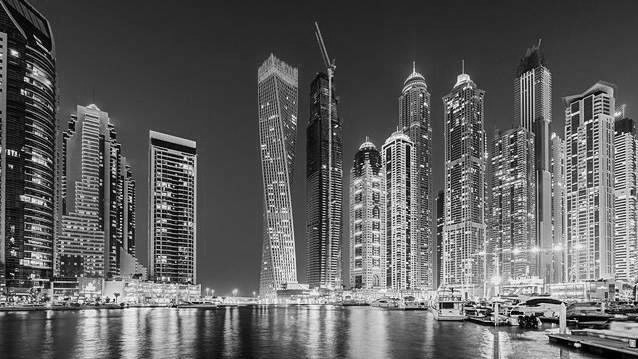

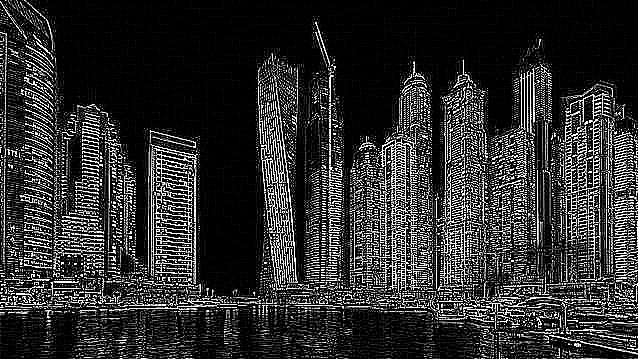

In [ ]:
cv2_imshow(img)
cv2_imshow(edge_img)
cv2.waitKey()
cv2.imwrite('edge.jpg', edge_img)
cv2.destroyAllWindows()